# Описание
Вы когда-нибудь задумывались, в какое время года лучше всего бронировать номер в отеле? Или оптимальную продолжительность пребывания, чтобы получить лучший дневной тариф? Что, если вы хотите предсказать, получит ли отель непропорционально большое количество специальных запросов?

Выясним, когда меньше всего приезжает людей с детьми

# Загрузка данных
Подключаем библиотеки.
Подключим гугл лиск, чтобы брать данные из него


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/ML/hotel_bookings.csv')
df.head(5)   

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail(5) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# проверка, сколько всего строк
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

# 1.	Предварительная обработка данных

## обрабатываем

Проверяем типы данных столбцов

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Определим, какие значения может принимать каждый столбец

In [7]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [8]:
df['is_canceled'].unique()

array([0, 1])

In [9]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [10]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [11]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [13]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [14]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [15]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [16]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

Рассмотирм каждый столбец отдельно и определим, поможет ли этот столбец добиться результата
- is_canceled                         да/нет

Эту информацию нужно оставить для того, чтобы знать, заселился ли в итоге человек или нет. Также благодаря этому значению можно узнать спрос
- lead_time - Количество дней, прошедших между датой бронирования и датой прибытия

Эта информация пригодится для того, чтобы узнать, за какое время люди начинают бронировать отели
- arrival_date_year - год поездки

Оставляем, чтобы посчитать итоговое количество людей
- arrival_date_month - месяц поездки
- arrival_date_week_number - номер недели года на начало поездки
- arrival_date_day_of_month - день поездки (дата)
- stays_in_weekend_nights - Количество ночей выходного дня (суббота или воскресенье), которые гость провел или забронировал для проживания в отеле
- stays_in_week_nights - Количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле
- adults - количество врозслых
- children - количество детей
- babies - количество младенцев
- meal - Типы питания в отелях: OB, BB, HB, FB, AI, UAI
- country - страна гостя

Можно использовать для определения сезона, когда приезжает больше всего иностранцев. Для таких периодов можно нанять сезонный персонал, который знает язык
- market_segment - определение сегмента рынка. В категориях термин “TA” означает “Туристические агенты”, а “TO” означает “туроператоры”

На результат не повлияет, можно удалить
- distribution_channel - как забронирован отель
- is_repeated_guest - гость едет не в 1 раз

На результат не повлияет, можно удалить
- previous_cancellations - количество предыдущих бронирований, не отмененных клиентом до текущего бронирования

Этот столбец неинформативен, удаляем
- previous_bookings_not_canceled - количество предыдущих бронирований, отмененных клиентом до текущего бронирования

Удаляем
- reserved_room_type - код зарезервированного типа номера. 

Тип номера влияет на его стоимость, поэтому оставляем
- assigned_room_type - код для типа номера, присвоенного бронированию.

Удаляем
- booking_changes - количество изменений, внесенных в бронирование

На результат не повлияет, можно удалить
- deposit_type - внесен ли депозит

На результат не повлияет, можно удалить
- agent - идентификатор туристического агентства, сделавшего бронирование
- company - идентификатор компании / организации, сделавшей бронирование
- days_in_waiting_list - количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту

По этим данным можно узанать, сколько придется ждать подтверждения бронирования, если мы решиим ехать
- customer_type - тип бронирования: Contract, Group, Transient, Transient-party

Нам эта информация не важна, поэтому удаляем
- adr - средняя дневная ставка, определяемая путем деления суммы всех сделок по размещению на общее количество ночей проживания.
- required_car_parking_spaces - количество парковочных мест, требуемых заказчиком
- total_of_special_requests - количество особых запросов с уточнениями и пожеланиями

На результат не повлияет, можно удалить
- reservation_status - статус бронирования: Canceled (отменено клиентом), Check-Out (клиент уже уехал), No-Show (клиент не явился)
- reservation_status_date - дата последнего обновления статуса

Удаляем

## Замена категориальных переменных


Так как нам не важно, какая компания или агент совершили бронирование, объединиим эти два столбца и заполним данными:
* 0 - клиент самостоятельно сделал бронирование
* 1 - бронирование сделал агент или компания

In [17]:
#for i in range(df['hotel'].count().astype(int)):
  # (df.iloc[i]) - первое число - номер строки, второе - номер столбца

In [18]:
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['how_booking'] = df['agent'] + df['company']
df.loc[(df.how_booking != 0), 'how_booking'] = 1
df['how_booking'] = df['how_booking'].astype(int)

В датасете месяца записаны буквами, перепишем их числами

In [19]:
mes = {"arrival_date_month":
       {"January": 1,
       "February": 2,
        "March": 3, 
        "April": 4, 
        "May": 5, 
        "June": 6, 
        "July": 7, 
        "August": 8, 
        "September": 9, 
        "October": 10, 
        "November": 11, 
        "December": 12},
}
df = df.replace(mes)

## Переименование столбцов

In [20]:
df = df.rename(columns={"adr": "price"})

## Очистка данных

Удалим столбцы 
axis=1 - удаление столбцов
axis=0 - удлаение строк
inplace=True изменяем текущий датафрейм, а не порождаем новый

In [21]:
 df = df.drop([ 'arrival_date_week_number', 'market_segment', 'is_repeated_guest', 'previous_cancellations', 'distribution_channel', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'customer_type', 'total_of_special_requests', 'reservation_status_date'], axis=1, inplace=False)

 df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,reserved_room_type,days_in_waiting_list,price,required_car_parking_spaces,reservation_status,how_booking
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,0,BB,PRT,C,0,0.0,0,Check-Out,0
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,0,BB,PRT,C,0,0.0,0,Check-Out,0
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,0,BB,GBR,A,0,75.0,0,Check-Out,0
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,0,BB,GBR,A,0,75.0,0,Check-Out,1
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,0,BB,GBR,A,0,98.0,0,Check-Out,1


### Удаление пропусков


Удалим пустые строчки
Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются. Также применяются тактики замены отсутствующих значений средним значением или средним значением этого столбца. В данном случае пропущено 99 значений - достаточная низкая доля всего набора данных из 10000 значений, поэтому удаление строк с пропущенными значениями не критично. 

Сначала выведем, сколько есть пропусков

In [22]:
print(df.isnull().sum())

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_day_of_month        0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
reserved_room_type               0
days_in_waiting_list             0
price                            0
required_car_parking_spaces      0
reservation_status               0
how_booking                      0
dtype: int64


Как можно заметить, пустых значений country и children немного относительно всего датасета, поэтому можем удалить строки с пустыми значениями.

In [23]:
df=df.dropna(axis=0,inplace=False)
print(df.isnull().sum()) # После удаления 

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
reserved_room_type             0
days_in_waiting_list           0
price                          0
required_car_parking_spaces    0
reservation_status             0
how_booking                    0
dtype: int64


Количество детей - целое число, поэтому преобразуем float в int

In [24]:
df['children'] = df['children'].astype(int)

<ipython-input-24-465e3b549408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].astype(int)


### Удаление дубликатов

In [25]:
df.shape #сколько изначально строк

(118898, 19)

In [26]:
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape) # Сколько таких строк
df = df.drop_duplicates()

number of duplicate rows:  (35522, 19)


In [27]:
df.count() # Сколько строк данных осталось

hotel                          83376
is_canceled                    83376
lead_time                      83376
arrival_date_year              83376
arrival_date_month             83376
arrival_date_day_of_month      83376
stays_in_weekend_nights        83376
stays_in_week_nights           83376
adults                         83376
children                       83376
babies                         83376
meal                           83376
country                        83376
reserved_room_type             83376
days_in_waiting_list           83376
price                          83376
required_car_parking_spaces    83376
reservation_status             83376
how_booking                    83376
dtype: int64

## Определение выбросов


Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Часто выбросы можно увидеть с помощью визуализации, используя т.н. “ящик с усами”. 

На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы.

Так как в таблицах присутствует два разных типа отеля, будем строить графики для двух случаев

In [28]:
 df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,reserved_room_type,days_in_waiting_list,price,required_car_parking_spaces,reservation_status,how_booking
0,Resort Hotel,0,342,2015,7,1,0,0,2,0,0,BB,PRT,C,0,0.0,0,Check-Out,0
1,Resort Hotel,0,737,2015,7,1,0,0,2,0,0,BB,PRT,C,0,0.0,0,Check-Out,0
2,Resort Hotel,0,7,2015,7,1,0,1,1,0,0,BB,GBR,A,0,75.0,0,Check-Out,0
3,Resort Hotel,0,13,2015,7,1,0,1,1,0,0,BB,GBR,A,0,75.0,0,Check-Out,1
4,Resort Hotel,0,14,2015,7,1,0,2,2,0,0,BB,GBR,A,0,98.0,0,Check-Out,1


Построим ящик с усами для цены и типа комнаты

In [29]:
df['reserved_room_type'].value_counts()

A    53152
D    17025
E     5909
F     2795
G     2030
B      956
C      906
H      596
L        6
P        1
Name: reserved_room_type, dtype: int64

Заметим, что комнату типа Р выбирали всего 1 раз, поэтому это значение можно убрать

In [30]:
# loc () – Извлечение значений из набора данных
df = df.loc[df['reserved_room_type'] != 'P']

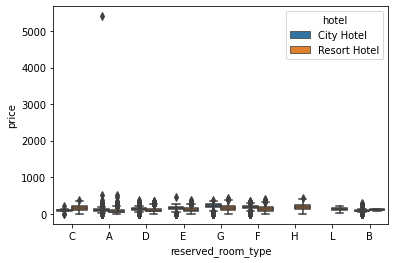

In [31]:
sns.boxplot(x="reserved_room_type",
            y="price",
            hue="hotel",
            data=df, 
            hue_order=["City Hotel", "Resort Hotel"])

Мы видим большой выброс у комнаты типа А. Это единственное значение, которое выбивается, поэтому удалим его

In [32]:
# loc () – Извлечение значений из набора данных
df = df.loc[df['price'] != df['price'].max()]

Вернемся к ящику с усами

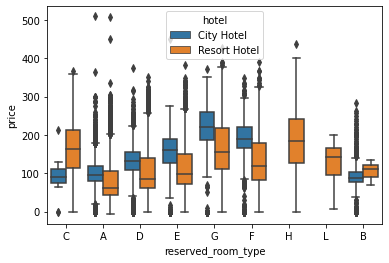

In [33]:
sns.boxplot(x="reserved_room_type",
            y="price",
            hue="hotel",
            data=df, 
            hue_order=["City Hotel", "Resort Hotel"])

На этом рисунке показана средняя цена за номер в зависимости от его типа.
ОДнако из-за анонимности данных мы не можем быть уверены в том, что номера с одинаковой буквой будут одинаковы в разных отелях

Посмотрим на ящик с усами у цены и типа питания

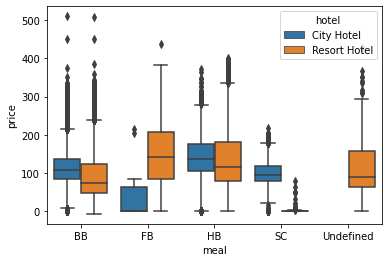

In [34]:
sns.boxplot(x="meal",
            y="price",
            hue="hotel",
            data=df, 
            hue_order=["City Hotel", "Resort Hotel"])

In [35]:
df['adults'].value_counts()

2     62110
1     14985
3      5837
0       367
4        59
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [36]:
df = df.loc[df['adults'] != 0]
df = df.loc[df['adults'] < 6]
df = df.loc[df['children'] < 10]
df['adults'].value_counts()

2    62109
1    14985
3     5837
4       59
5        2
Name: adults, dtype: int64

Посчитаем межквартильный размах

In [37]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                      1.000
lead_time                      112.000
arrival_date_year                1.000
arrival_date_month               5.000
arrival_date_day_of_month       15.000
stays_in_weekend_nights          2.000
stays_in_week_nights             3.000
adults                           0.000
children                         0.000
babies                           0.000
days_in_waiting_list             0.000
price                           61.175
required_car_parking_spaces      0.000
how_booking                      0.000
dtype: float64


Удаление выбросов. Этот шаг лучше не делать, потому что удаляется больше половины данных

In [38]:
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

In [39]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month               int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
meal                            object
country                         object
reserved_room_type              object
days_in_waiting_list             int64
price                          float64
required_car_parking_spaces      int64
reservation_status              object
how_booking                      int64
dtype: object

## Гистограммы


Гистограмма показывает встречаемость переменных в интервале.

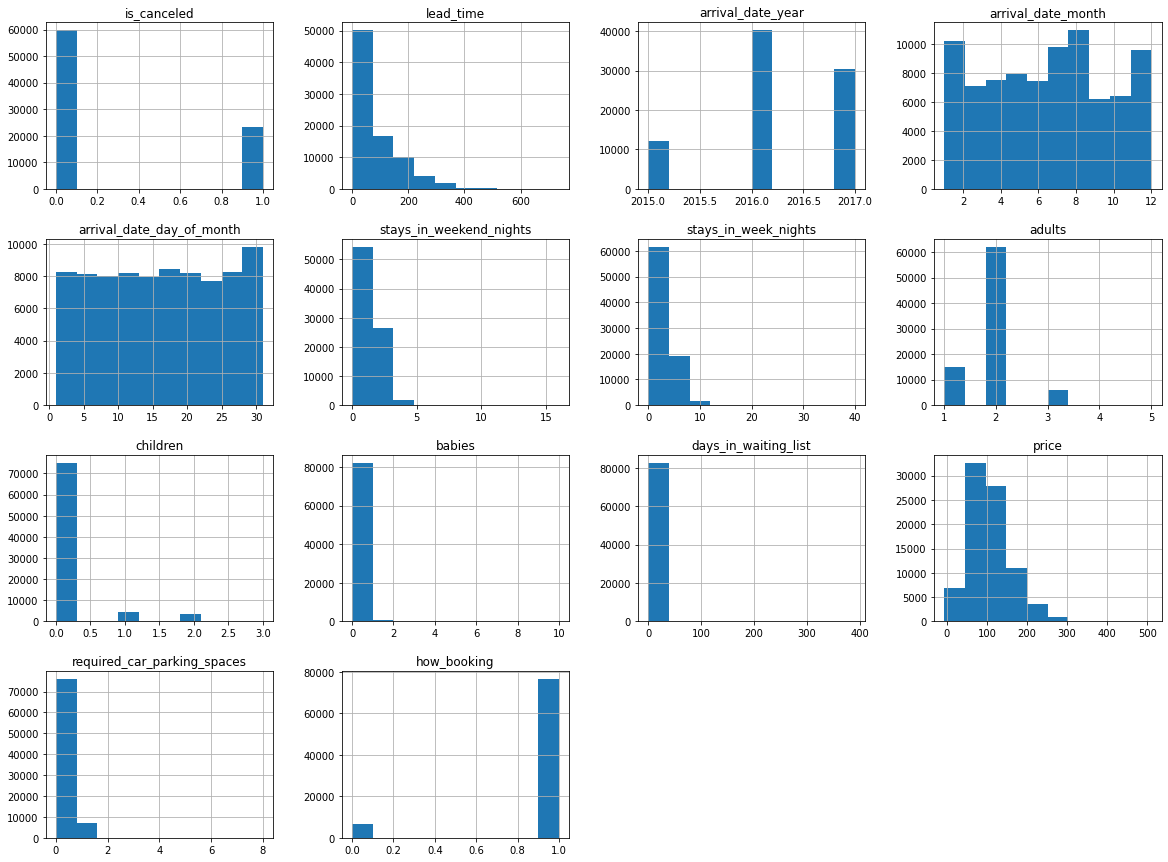

In [40]:
df.hist(figsize=(20,15))
plt.show()

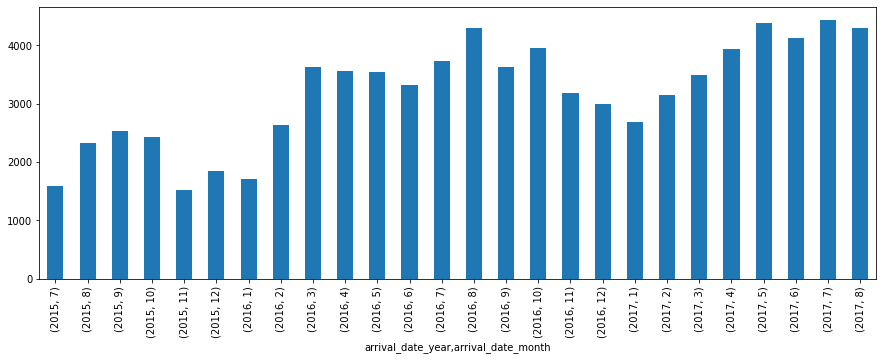

In [41]:
df.groupby(['arrival_date_year', 'arrival_date_month']).size().plot.bar(figsize=(15,5))

## Преобразуем данные в числа

In [42]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month               int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
meal                            object
country                         object
reserved_room_type              object
days_in_waiting_list             int64
price                          float64
required_car_parking_spaces      int64
reservation_status              object
how_booking                      int64
dtype: object

In [43]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [44]:
df['meal'].value_counts()

BB           64577
SC            9237
HB            8443
Undefined      402
FB             333
Name: meal, dtype: int64

In [45]:
df['reserved_room_type'].value_counts()

A    53021
D    17001
E     5894
F     2790
G     2027
C      905
B      752
H      596
L        6
Name: reserved_room_type, dtype: int64

In [46]:
mes = {"hotel":
       {"Resort Hotel": 0,
       "City Hotel": 1},
       "meal":
       {"BB": 1,
       "FB": 2,
       "HB": 3,
       "SC": 4,
       "Undefined": 0},
       "reserved_room_type":
       {"A": 0,
       "B": 1,
       "C": 2,
       "D": 3,
       "E": 4,
       "F": 5,
       "G": 6,
       "H": 7,
       "L": 8}
}
df = df.replace(mes)

## Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты. На приведенной ниже тепловой карте видно. что ценовая характеристика в основном зависит от мощности и года выпуска

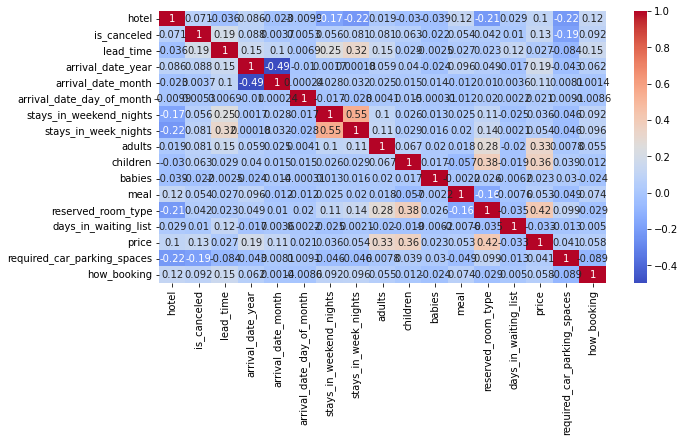

In [47]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

Видим, что больше всего зависят параметры количество дней и количество выходных, что вполне логично.
Также чем больше человек заселяется, тем выше цена.
Есть зависимость между lead_time (количество дней, прошедших между датой бронирования и датой прибытия) и количеством ночей.
Цена зависит от года и месяца, типа номера.
Тип номера зависит от того, будут там жить дети или нет.

## Диаграмма рассеяния

Диаграммы рассеяния используют, чтобы найти корреляцию между двумя переменными.

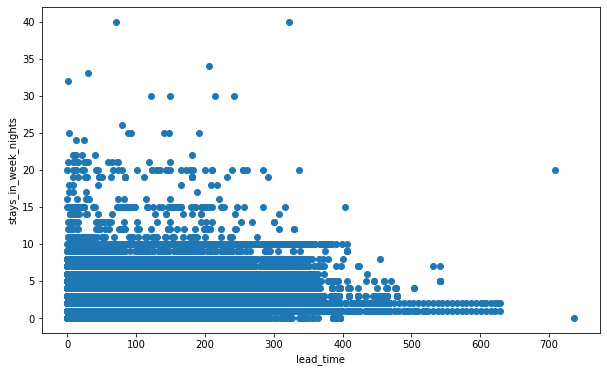

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['lead_time'], df['stays_in_week_nights'])
ax.set_xlabel('lead_time')
ax.set_ylabel('stays_in_week_nights')
plt.show()

Чаще всего люди совершают бронирование меньше, чем за 300 дней до прибытия. Но можно заметить, что чем дольше человек планирует находиться в отеле, тем меньше проходит времени от бронирования до заезда

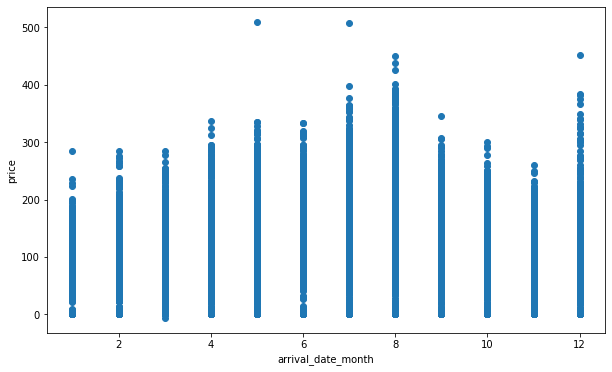

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['arrival_date_month'], df['price'])
ax.set_xlabel('arrival_date_month')
ax.set_ylabel('price')
plt.show()

Дороже всего бронировать отели в августе, но также бывают единичные случаи высокой цены в мае, июле и декабре. Скорее всего это даты выпускных и новый год.

Цена зависит от того, как сделано бронирование

0 - клиент самостоятельно сделал бронирование

1 - бронирование сделал агент или компания

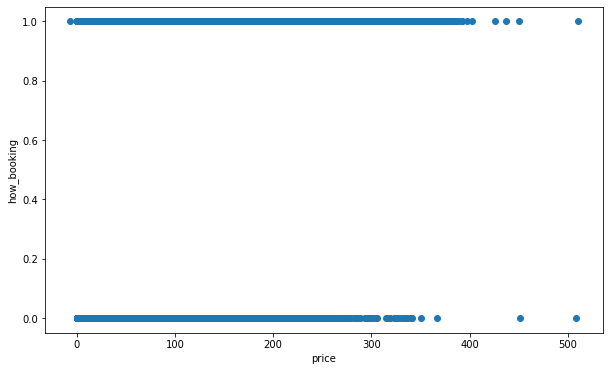

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['how_booking'])
ax.set_xlabel('price')
ax.set_ylabel('how_booking')
plt.show()

При бронировании через агента часто встречается высокая цена

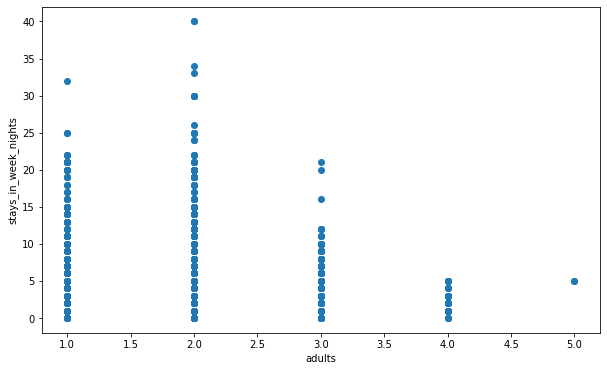

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['adults'], df['stays_in_week_nights'])
ax.set_xlabel('adults')
ax.set_ylabel('stays_in_week_nights')
plt.show()

Люди вдвоем чаще приезжают на большое количество дней

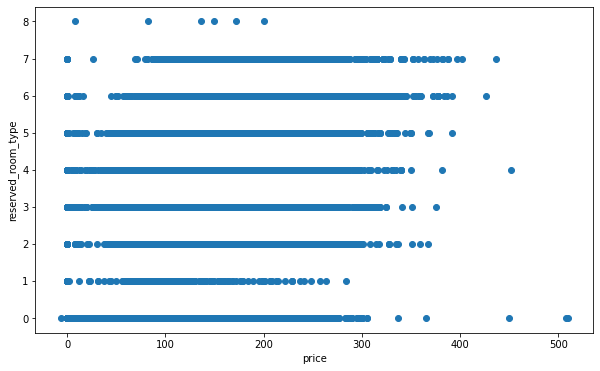

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['reserved_room_type'])
ax.set_xlabel('price')
ax.set_ylabel('reserved_room_type')
plt.show()

Чаще всего комната типа 1 стоит дешевле всех. Начальная цена комнаты типа 7 больше остальных

# 2.	Построение моделей

## библиотеки

In [53]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings(action='once')

le = preprocessing.LabelEncoder()
%matplotlib inline 

In [54]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (
    AffinityPropagation,
    AgglomerativeClustering,
    KMeans,
    SpectralClustering,
    MeanShift,
    DBSCAN,
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [55]:
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
#from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture as EM

from sklearn import metrics

from scipy.spatial.distance import pdist

from collections import defaultdict

## Проверка на сбалансированность данных.

Несбалансированность данных обычно отражает неравное распределение классов в наборе данных. 

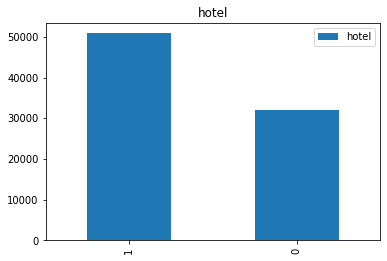

In [56]:
from sklearn.model_selection import train_test_split

df1 = df.drop([ 'country', 'reservation_status'], axis=1, inplace=False)

X = df1.copy()
X['hotel']  = le.fit_transform(X['hotel']) # Кодировка целевых классов со значением от 0 до n_classes-1.
y = X.pop('hotel') # вырезание и присваивание

y.value_counts().plot(kind='bar', label='hotel')
plt.legend()
plt.title('hotel');

Отеля типа 0 примерно в 2 раза меньше.

Воспользуемся передискретизацией.

Это процесс генерации синтетических данных, который пытается случайным образом сгенерировать выборку атрибутов из наблюдений в классе меньшинства. Существует ряд методов, используемых для передискретизации набора данных для типичной задачи классификации. Самый распространенный метод называется **SMOTE** (Synthetic Minority Over-sampling Technique/метод передискретизации синтетических меньшинств). SMOTE работает, выбирая примеры, которые расположены близко в пространстве признаков. Сначала выбирается случайный пример из класса меньшинства. Затем для этого примера находятся k ближайших соседей (обычно k = 5). Выбирается случайно выбранный сосед и создается синтетический пример в случайно выбранной точке между двумя примерами в пространстве признаков.

In [57]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)

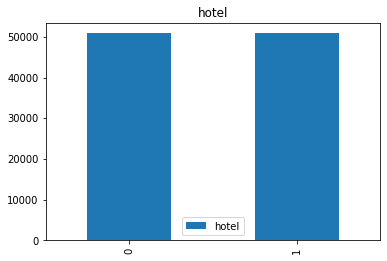

In [58]:
y.value_counts().plot(kind='bar', label='hotel')
plt.legend()
plt.title('hotel');

## PCA. Метод главных компонент

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

sc = StandardScaler()  
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, y, test_size=0.3, stratify=y, random_state = 100)

Посмотрим что получается с помощью дерева решений

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_pred, y_test)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     15256
           1       0.91      0.91      0.91     15256

    accuracy                           0.91     30512
   macro avg       0.91      0.91      0.91     30512
weighted avg       0.91      0.91      0.91     30512

[[13850  1381]
 [ 1406 13875]]


Подключим PCA

In [61]:
from sklearn.decomposition import PCA

pca = PCA()
X_sc_centered = X_sc - X_sc.mean(axis=0)
pca.fit(X_sc_centered)
X_pca = pca.transform(X_sc_centered)

explained_variance = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance):
    print(f"{i}: {round(ratio*100, 2)} %")

0: 14.25 %
1: 10.82 %
2: 9.58 %
3: 7.56 %
4: 6.58 %
5: 6.37 %
6: 6.21 %
7: 6.13 %
8: 5.63 %
9: 5.55 %
10: 5.07 %
11: 4.42 %
12: 3.72 %
13: 3.33 %
14: 2.6 %
15: 2.17 %


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, stratify=y, random_state = 100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_pred, y_test)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     15256
           1       0.84      0.83      0.83     15256

    accuracy                           0.83     30512
   macro avg       0.83      0.83      0.83     30512
weighted avg       0.83      0.83      0.83     30512

[[12754  2583]
 [ 2502 12673]]


Результат немного хуже, но незначительно. 

Уменьшим размерность. Оставим 2 компонента

In [63]:
pca = PCA(n_components=2)
X_sc_centered = X_sc - X_sc.mean(axis=0)
pca.fit(X_sc_centered)
X_pca = pca.transform(X_sc_centered)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state = 100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_pred, y_test)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     15256
           1       0.91      0.91      0.91     15256

    accuracy                           0.91     30512
   macro avg       0.91      0.91      0.91     30512
weighted avg       0.91      0.91      0.91     30512

[[13856  1388]
 [ 1400 13868]]


Качество алгоритма улучшилось

## k-means

Text(0.5, 1.0, 'PCA')

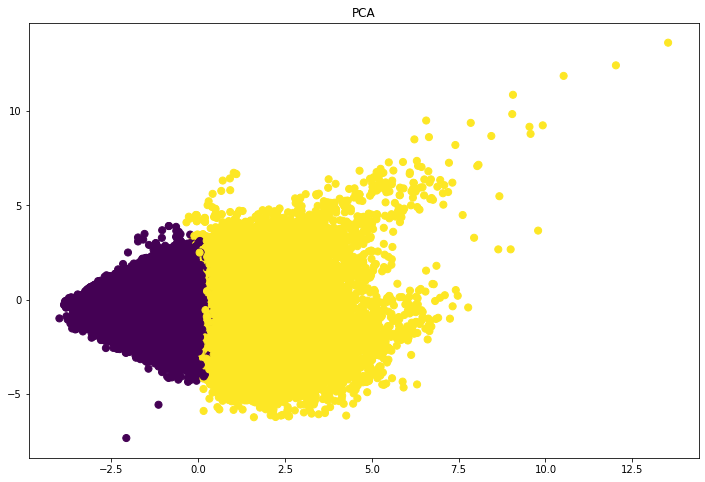

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(X_sc)

# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(X_sc)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

критерий: сумма квадратов расстояний от точек до центроидов кластеров, к которым они относятся.
$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

C – множество кластеров мощности K

u центроид кластера Ck

Для выбора числа кластеров часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого описанный функционал $ J(C) $ падает "уже не так быстро". Или более формально: 
$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$


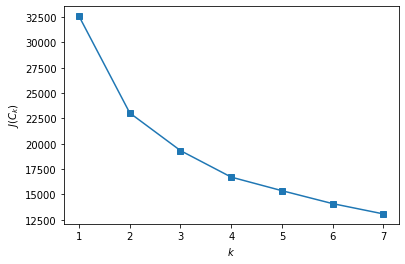

In [65]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

Нужно брать 3 кластера

Numbers of classes: {0: 31826, 1: 29463, 2: 40417}


Text(0.5, 1.0, 'PCA')

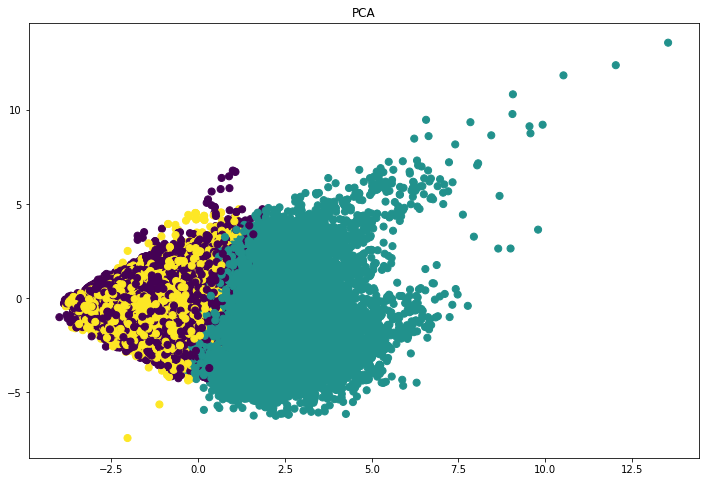

In [66]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X_sc)

d_classes = {i: 0 for i in range(3)}
for i in kmeans.labels_:
    d_classes[i] += 1

print(f"Numbers of classes: {d_classes}")

pca = PCA(n_components=2)
res = pca.fit_transform(X_sc)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [68]:
print(f"Silhouette: {metrics.silhouette_score(X, kmeans.labels_)}") 

Silhouette: 0.011839192599936531


## DBSCAN

In [69]:
df2 = df1.copy()

for eps_i_int in range(5, 50, 5):
    eps_i = eps_i_int / 100
    for min_samples_i in range(3, 9, 2):
        dbscan = DBSCAN(eps=eps_i, min_samples=min_samples_i).fit(df2)
        number_of_class = len(set(dbscan.labels_))
        print(f"\nFor eps={eps_i} and min_samples={min_samples_i} {number_of_class} classes")
        if(number_of_class < 15):
            d = defaultdict(lambda:0)
            for row_i in dbscan.labels_:
                d[row_i] += 1
            print(f"\t{d}")


For eps=0.05 and min_samples=3 245 classes

For eps=0.05 and min_samples=5 49 classes

For eps=0.05 and min_samples=7 22 classes

For eps=0.1 and min_samples=3 245 classes

For eps=0.1 and min_samples=5 49 classes

For eps=0.1 and min_samples=7 22 classes

For eps=0.15 and min_samples=3 246 classes

For eps=0.15 and min_samples=5 49 classes

For eps=0.15 and min_samples=7 22 classes

For eps=0.2 and min_samples=3 247 classes

For eps=0.2 and min_samples=5 49 classes

For eps=0.2 and min_samples=7 22 classes

For eps=0.25 and min_samples=3 248 classes

For eps=0.25 and min_samples=5 49 classes

For eps=0.25 and min_samples=7 22 classes

For eps=0.3 and min_samples=3 250 classes

For eps=0.3 and min_samples=5 49 classes

For eps=0.3 and min_samples=7 22 classes

For eps=0.35 and min_samples=3 250 classes

For eps=0.35 and min_samples=5 49 classes

For eps=0.35 and min_samples=7 22 classes

For eps=0.4 and min_samples=3 250 classes

For eps=0.4 and min_samples=5 49 classes

For eps=0.4 a

Numbers of classes: defaultdict(<function <lambda> at 0x7f8af800daf0>, {-1: 101388, 0: 8, 1: 10, 2: 9, 3: 7, 4: 9, 5: 10, 6: 7, 7: 7, 8: 10, 9: 7, 10: 21, 11: 13, 12: 11, 13: 12, 14: 7, 15: 10, 16: 7, 17: 7, 18: 15, 19: 8, 20: 16, 21: 12, 22: 8, 23: 8, 24: 21, 25: 11, 26: 7, 27: 13, 28: 7, 29: 11, 30: 9})


Text(0.5, 1.0, 'PCA')

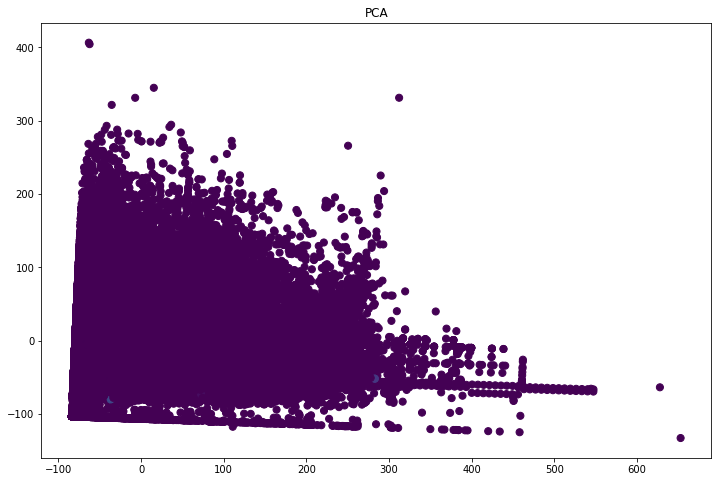

In [72]:
dbscan = DBSCAN(eps=0.1, # расстояние эпсилон окрестности
                min_samples=7).fit(X) # минимальное количество данных в классе
d = defaultdict(lambda:0)
# количество данных в каждом классе
for row_i in dbscan.labels_:
    d[row_i] += 1

# выводим сколько классов и сколько в них данных
print(f"Numbers of classes: {d}")

pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=dbscan.labels_, s=50, cmap='viridis')
plt.title('PCA')


In [73]:
print(f"Silhouette: {metrics.silhouette_score(X, dbscan.labels_)}") 

Silhouette: -0.7589928570430772


##Mean-Shift

Кластеризация среднего сдвига — это алгоритм на основе скользящего окна, который пытается найти плотные области точек данных.

Numbers of classes: defaultdict(<function <lambda> at 0x7f8af7ee1af0>, {28286: 1, 27862: 1, 80497: 1, 75335: 1, 2370: 2, 97186: 1, 78523: 1, 15320: 1, 16311: 1, 23578: 1, 64215: 1, 1729: 2, 72161: 1, 63349: 1, 63348: 1, 76099: 1, 97188: 1, 80494: 1, 63347: 1, 53090: 1, 53089: 1, 42792: 1, 51703: 1, 59598: 1, 18049: 1, 51951: 1, 47364: 1, 48146: 1, 14302: 1, 53822: 1, 20039: 1, 20770: 1, 74002: 1, 63776: 1, 20312: 1, 53568: 1, 20038: 1, 60584: 1, 73404: 1, 46079: 1, 19751: 1, 1549: 2, 45073: 1, 49130: 1, 58975: 1, 45074: 1, 48515: 1, 52178: 1, 86256: 1, 91236: 1, 91235: 1, 3431: 2, 97185: 1, 97183: 1, 74681: 1, 77699: 1, 83064: 1, 72771: 1, 48516: 1, 27145: 1, 77698: 1, 86254: 1, 58680: 1, 16783: 1, 17669: 1, 17790: 1, 13847: 1, 88144: 1, 74001: 1, 19212: 1, 86253: 1, 19610: 1, 88143: 1, 53088: 1, 51062: 1, 47362: 1, 3638: 1, 28086: 1, 15682: 1, 47361: 1, 28584: 1, 53821: 1, 15894: 1, 76098: 1, 78521: 1, 91233: 1, 70607: 1, 78520: 1, 319: 3, 13156: 1, 16687: 1, 17668: 1, 55380: 1, 47027

Text(0.5, 1.0, 'PCA')

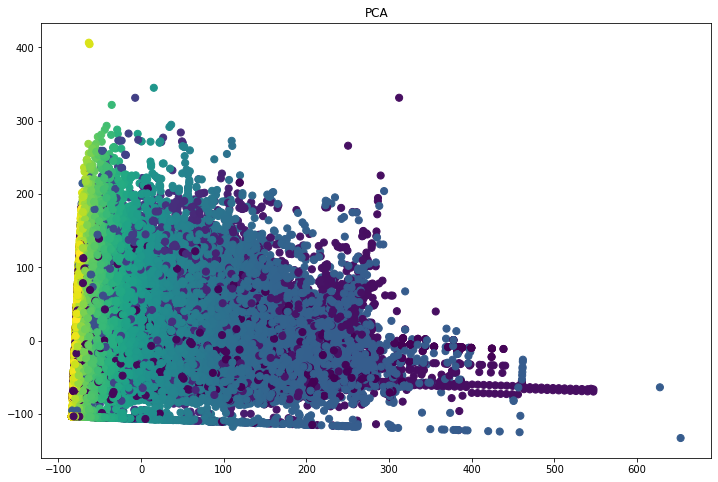

In [74]:
flat_shift = MeanShift(bandwidth=0.6).fit(X)
d = defaultdict(lambda:0)
for row_i in flat_shift.labels_:
    d[row_i] += 1

print(f"Numbers of classes: {d}")

pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=flat_shift.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [75]:
print(f"Silhouette: {metrics.silhouette_score(X, flat_shift.labels_)}") 

Silhouette: 0.07487088616013586


## Алгомеративная иерархическая кластеризация


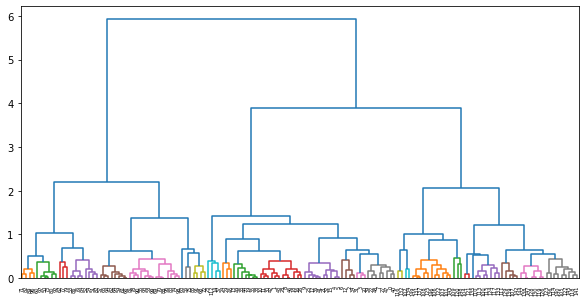

In [76]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X1 = np.zeros((150, 2))

np.random.seed(seed=42)
X1[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X1[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X1[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X1[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X1[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X1[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

distance_mat = pdist(X1)  # pdist посчитает верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(
    distance_mat, "complete"
)  # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

## диаграмма

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters = 9).fit(X1)

d = defaultdict(lambda:0)
for row_i in agglomerative.labels_:
    d[row_i] += 1

print(f"Numbers of classes: {d}")

pca = PCA(n_components=2)
res = pca.fit_transform(X1)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=agglomerative.labels_, s=50, cmap='viridis')
plt.title('PCA')

## EM. Кластеризация методом максимизации ожидания

In [77]:
N_max = 13
RndState = 5051

for i in range(1, N_max):
    em = EM(n_components=i, random_state=RndState).fit(X_sc)
    pd.set_option('display.max_rows', i)
    print(f"\nFor n_components={i}: \n{pd.DataFrame(em.predict(X_sc)).value_counts()}")


For n_components=1: 
0    101706
dtype: int64

For n_components=2: 
0    91067
1    10639
dtype: int64

For n_components=3: 
2    90944
1    10018
0      744
dtype: int64

For n_components=4: 
2    76288
0    13824
3    10762
1      832
dtype: int64

For n_components=5: 
2    76248
0    13813
3     9852
4      920
1      873
dtype: int64

For n_components=6: 
5    76248
2    13813
3     8984
4      920
0      875
1      866
dtype: int64

For n_components=7: 
0    49653
6    23474
2    13315
5     7239
3     6273
4      953
1      799
dtype: int64

For n_components=8: 
1    49796
0    23327
7     9380
4     6956
2     5941
3     5205
6      701
5      400
dtype: int64

For n_components=9: 
2    43531
5    18296
1    13969
7     8382
4     7908
8     7662
6      743
0      679
3      536
dtype: int64

For n_components=10: 
4    34203
2    25168
1    20436
8     7234
7     6446
5     3022
0     1937
3     1570
9      953
6      737
dtype: int64

For n_components=11: 
10    43511
0     17

Numbers of classes: {0: 23327, 1: 49796, 2: 5941, 3: 5205, 4: 6956, 5: 400, 6: 701, 7: 9380}


Text(0.5, 1.0, 'PCA')

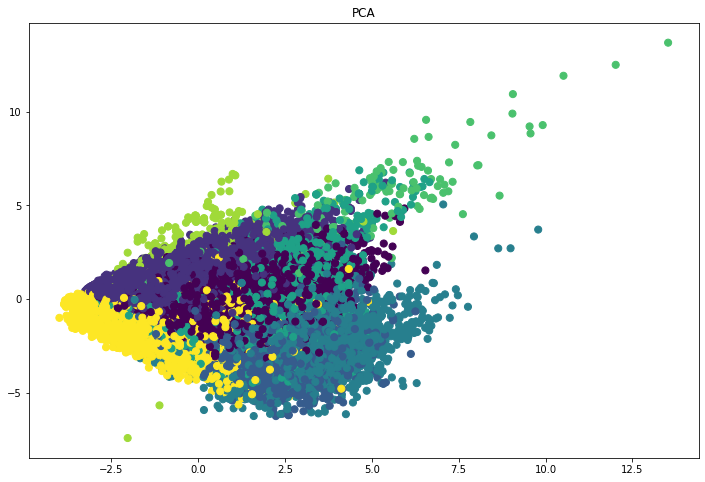

In [78]:
N_CLASTERS = 8
em = EM(n_components=N_CLASTERS, random_state=RndState).fit(X_sc)

em_labels = em.predict(X_sc)
d_classes = {i: 0 for i in range(N_CLASTERS)}
for i in em_labels:
    d_classes[i] += 1

print(f"Numbers of classes: {d_classes}")

pca = PCA(n_components=2)
res = pca.fit_transform(X_sc)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=em.predict(X_sc), s=50, cmap='viridis')
plt.title('PCA')

In [ ]:
print(f"Silhouette: {metrics.silhouette_score(X, em.labels_)}") 

# Метрики качества кластеризации

ARI (Adjusted Rand Index) - Отрицательные значения соответствуют “независимым” разбиениям на кластеры, значения, близкие к нулю, - случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи (совпадают при ARI=1).

AMI (Adjusted Mutual Information) - почти тоже самое, зависит от энтропии.

Гомогенность - показывает, во сколько раз энтропия изменяется за счёт того, что мы считаем известной принадлежность объектов к выделенным нашим алгоритмом кластерам. Худший случай — когда отношение оказывается равным единице (энтропия не изменилась, условная энтропия совпала с обычной), лучший — когда каждый кластер содержит элементы только одного класса.

Полнота -  Полнота равна единице, когда все объекты класса всегда оказываются в одном кластере.


V-мера - показывает, насколько две кластеризации схожи между собой. Среднее гармоническое результата кластеризации и истинного разбиения выборки на классы. показывает, насколько две кластеризации схожи между собой.

s -  средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к 0, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.

$a$ - среднее расстояние от данного объекта до объектов из того же кластера

$b$ - среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект). Тогда силуэтом данного объекта называется величина: $$s = \frac{b - a}{\max(a, b)}.$$

In [ ]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (
    AffinityPropagation,
    AgglomerativeClustering,
    KMeans,
    SpectralClustering,
)



algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=2))
#algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, algo.labels_),
                "Homogenity": metrics.homogeneity_score(y, algo.labels_),
                "Completeness": metrics.completeness_score(y, algo.labels_),
                "V-measure": metrics.v_measure_score(y, algo.labels_),
                #"Silhouette": metrics.silhouette_score(X, algo.labels_),
            }
        )
    )

results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Agglomerative"],
)

results

In [ ]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (
    AffinityPropagation,
    AgglomerativeClustering,
    KMeans,
    SpectralClustering,
    MeanShift,
    DBSCAN,
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN())
algorithms.append(MeanShift(bandwidth=0.9))
gm = GaussianMixture(n_components=15, random_state=1).fit(X_sc)

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, algo.labels_),
                "Homogenity": metrics.homogeneity_score(y, algo.labels_),
                "Completeness": metrics.completeness_score(y, algo.labels_),
                "V-measure": metrics.v_measure_score(y, algo.labels_),
                "Silhouette": metrics.silhouette_score(X, algo.labels_),
            }
        )
    )
data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, gm.predict(X)),
                "AMI": metrics.adjusted_mutual_info_score(y, gm.predict(X)),
                "Homogenity": metrics.homogeneity_score(y, gm.predict(X)),
                "Completeness": metrics.completeness_score(y, gm.predict(X)),
                "V-measure": metrics.v_measure_score(y, gm.predict(X)),
                #"Silhouette": metrics.silhouette_score(X, gm.predict(X)),
            }
        )
    )
results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Agglomerative", "DBSCAN", "MeanShift", "EM"],
)

results